**Import Libraries**

In [1]:
'''In this code cell, various libraries required for code execution are imported.'''

import numpy as np
import pandas as pd
import matplotlib as plt
import random

random.seed(10)

**Data set generation**

In [2]:
'''In this code cell, a synthetic dataset is generated which consists of 3 columns - 
probability, actual_y and predicted_y. There are a total of 50 data points in this dataset.
The probability column indicates the probabilities predicted by a model and are generated using 
random number generation between 0 & 1. The values in actual_y column are the actual values of 
dependent variable of the dataset. These entries in actaul_y are assigned value of 1 for 1st 25 
entries and 0 for next 25 entries. The values in predicted_y are predicted values of dependent 
variable of the dataset. These predicted_y values are obtained by comparing the values of 
probability column with the cut-off which is 0.5 in this case. A probability of more than 0.5 
is assigned a value of 1 in predicted_y column else a value of 0 is assigned.'''

data = []
for i in range(1,51):
  if i < 26:
    row = [random.random(), 1]
    row.append(0 if row[0] < .5 else 1)
    data.append(tuple(row))
  else:
    row = [random.random(), 0]
    row.append(0 if row[0] < .5 else 1)
    data.append(tuple(row))

df = pd.DataFrame(data, columns=['probability', 'actual_y', 'predicted_y'])
df.head(5)
#print(data)
#print(df)

,probability,actual_y,predicted_y
0,0.571403,1,1
1,0.428889,1,0
2,0.578091,1,1
3,0.206098,1,0
4,0.813321,1,1


**Data preparation**

In [3]:
'''In this code cell, data preparation is done. A sorted data frame called df_sorted is created 
by sorting the probability data in df dataframe in descending order. Subsequently 3 numpy 
arrays namely probability, actual_y and predicted_y are created by the values from the columns 
with same name in df_sorted.'''

df_sorted = df.sort_values(by='probability', ascending=False)
#print(df_sorted)

probability = df_sorted['probability'].to_numpy()
#print(probability)

actual_y = df_sorted['actual_y'].to_numpy()
#print(actual_y)

predicted_y = df_sorted['predicted_y'].to_numpy()
#print(predicted_y)

**Confusion matrix**

In [4]:
'''In this code cell, confusion matrix is created. Each value of predicted_y is compared by 
the corresponding value of actual_y; and the labels of TN, FN, TP & FP are assigned for True 
negative, False negative, True positive & False positive respectively. False positive rate 
and True positive rate are also calculated.'''

comparision = []
for k in range(0, 50):
  if predicted_y[k] == 0 and predicted_y[k] == actual_y[k]:
    comparision.append('TN')
  if predicted_y[k] == 0 and predicted_y[k] != actual_y[k]:
    comparision.append('FN')
  if predicted_y[k] == 1 and predicted_y[k] == actual_y[k]:
    comparision.append('TP')
  if predicted_y[k] == 1 and predicted_y[k] != actual_y[k]:
    comparision.append('FP')
print('Confusion matrix:')
print(np.array([[comparision.count('TN'), comparision.count('FP')], [comparision.count('FN'), comparision.count('TP')]]))
print('Total True Positive = ', comparision.count('TP'))
print('Total True Negative = ', comparision.count('TN'))
print('Total False Positive = ', comparision.count('FP'))
print('Total False Negative = ', comparision.count('FN'))
print('False positive rate, FPR = ', comparision.count('FP')/np.count_nonzero(actual_y == 0))
print('True positive rate, TPR = ', comparision.count('TP')/np.count_nonzero(actual_y == 1))

Confusion matrix:
[[14 11]
 [10 15]]
Total True Positive =  15
Total True Negative =  14
Total False Positive =  11
Total False Negative =  10
False positive rate, FPR =  0.44
True positive rate, TPR =  0.6


**Compare the Confusion matrix obtained above with Confusion matrix obtained by using standard library**

In [5]:
'''In this code cell, the confusion matrix obtained above in the previous cell is compared 
to confusion matrix obtained by using standard library. We find that the confusion matrix 
obtained above is correct.'''

from sklearn.metrics import confusion_matrix

confusion_matrix(actual_y, predicted_y)

array([[14, 11],
       [10, 15]])

**Generate TPR and FPR for ROC**

In [6]:
'''In this code cell, x and y cordinates for ROC curve are calculated and stored in FPR and TPR 
respectively. Each value in probability array is made a benchmark and other values are compared 
with it to create a comparision array which indicates whether the bench mark based predictions 
are True negative (TN) or False negative (FN) or True positive (TP) or False positive (FP)'''

benchmark = 10

FPR = []
TPR = []
for j in range(0, 50):
  if probability[j] != benchmark:
    benchmark = probability[j]
    benchmark_based_predictions = []
    comparision = []
    for k in range(0, 50):
      benchmark_based_predictions.append(1 if probability[k] >= benchmark else 0)      
      if benchmark_based_predictions[k] == 0 and benchmark_based_predictions[k] == actual_y[k]:
        comparision.append('TN')
      if benchmark_based_predictions[k] == 0 and benchmark_based_predictions[k] != actual_y[k]:
        comparision.append('FN')
      if benchmark_based_predictions[k] == 1 and benchmark_based_predictions[k] == actual_y[k]:
        comparision.append('TP')
      if benchmark_based_predictions[k] == 1 and benchmark_based_predictions[k] != actual_y[k]:
        comparision.append('FP')
    x = comparision.count('FP')/np.count_nonzero(actual_y == 0)
    FPR.append(x)
    y = comparision.count('TP')/np.count_nonzero(actual_y == 1)  
    TPR.append(y)  

#print(FPR)
#print(TPR)

**Plot ROC and calculate AUC**

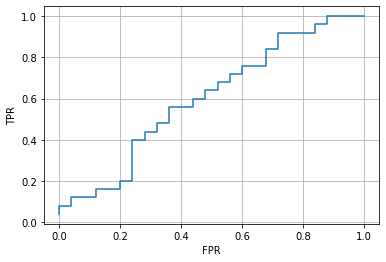

0.6


In [7]:
'''In this code cell, ROC is plotted and AUC is calculated using trapezoidal rule.'''

plt.pyplot.plot(FPR, TPR)
plt.pyplot.ylabel('TPR')
plt.pyplot.xlabel('FPR')
plt.pyplot.grid()
plt.pyplot.show()

area = sum(.5*(TPR[i] + TPR[i+1])*(FPR[i+1] - FPR[i]) for i in range(0,49))
print(area)

**Compare AUC calculated above with AUC calculated by using standard library**

In [8]:
'''In this codecell, the AUC calculated above in the previous cell is caompared with the AUC 
calculated by using standard library. We find that the AUC calculated above is correct.'''

from sklearn.metrics import roc_auc_score

roc_auc_score(actual_y, probability)

0.6000000000000001